# Praktikum 12

menghubungkan colab dengan drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import library

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #untuk 3D

plt.rcParams['figure.figsize'] = (8, 6)

load dataset sirup

In [3]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


eksplorasi awal dataset sirup

In [4]:
# informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
# statistik deskriptif
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


data cleaning

In [6]:
# cek missing value
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [7]:
# cek data duplikat
df.duplicated().sum()

np.int64(0)

In [8]:
# distribusi kelas target

print("Nama kelas:", wine.target_names)
df['target'].value_counts()

Nama kelas: ['class_0' 'class_1' 'class_2']


,count
target,
1,71
0,59
2,48


pemisahan fitur dan label

In [9]:
# fitur dan label
X = wine.data
y = wine.target

print("Shape X:", X.shape) #(178, 13)
print("Shape y:", y.shape) #(178,)

Shape X: (178, 13)
Shape y: (178,)


pembagian data latih dan data uji (Train-test split)

In [10]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Shape X_train: (142, 13)
Shape X_test: (36, 13)


standarisasi data (Mean =0, std=1)

In [11]:
# standarisasi (mean=0, std=1)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 0.38580089, -0.63787118,  1.77666817, -1.22453161,  0.69643032,
         0.52686525,  0.73229212, -0.1695489 , -0.41578344, -0.16746725,
         0.62437819,  0.2529082 ,  0.46772474],
       [ 0.94851892, -0.76544542,  1.25317383,  0.85328406,  0.09178497,
         1.17279546,  1.33318146, -0.59045701,  1.34974202,  0.30530313,
         1.06715537,  0.15104809,  1.81576773],
       [ 0.52335419, -0.51940939,  0.9540342 , -1.04643312, -0.44567755,
         0.93057163,  1.006382  , -0.1695489 , -0.26000178, -0.081509  ,
        -0.12834302,  0.89317174,  1.51620262],
       [ 0.97352861, -0.55585917,  0.16879269, -1.0761162 , -0.71440882,
         0.52686525,  0.81662747, -0.59045701,  0.36312485,  0.262324  ,
         0.8900445 ,  0.42752553,  1.93226527],
       [ 0.43582027,  0.82012009,  0.05661533,  0.55645325, -0.51286037,
        -0.55506784, -1.29175618,  0.75644894, -0.60618325,  1.47433535,
        -1.76661859, -1.43505932, -0.29783054]])

penerapan model SVM tanpa PCA (baseline model)

In [12]:
# model SVM tanpa PCA
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

# prediksi dan evaluasi
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi  SVM tanpa PCA:", acc_no_pca)

print("\nClassification Report (tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca, target_names=wine.target_names))

Akurasi  SVM tanpa PCA: 0.9722222222222222

Classification Report (tanpa PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



penerapan PCA (Pricial Component Analysis

In [13]:
# PCA dengan 3 komponen utama
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Shape X_train_pca:", X_train_pca.shape) #(n_train, 3)
print("Shape X_testn_pca:", X_test_pca.shape) #(n_test, 3)

Shape X_train_pca: (142, 3)
Shape X_testn_pca: (36, 3)


menampilkan variasi yang dijelaskan oleh setiap komponen PCA

In [14]:
# variasi yang dijelaskan oleh tiap komponen
explained_var = pca.explained_variance_ratio_
print("VExplained variasi ratio tiap komponen:", explained_var)
print("Total variasi yang dijelaskan 3 komponen pertama:" , explained_var.sum())

VExplained variasi ratio tiap komponen: [0.35792104 0.19270671 0.11019835]
Total variasi yang dijelaskan 3 komponen pertama: 0.6608261082211259


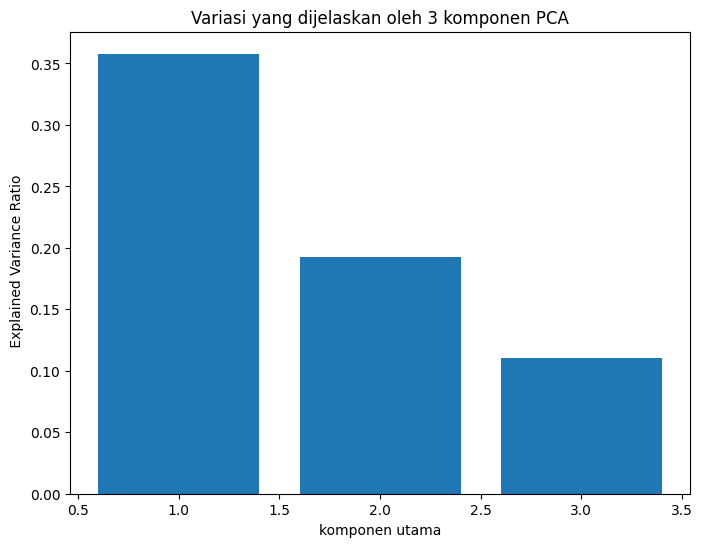

In [15]:
plt.bar ([1, 2, 3], explained_var)
plt.xlabel('komponen utama')
plt.ylabel(' Explained Variance Ratio')
plt.title('Variasi yang dijelaskan oleh 3 komponen PCA')
plt.show()

membangun moodel SVM dengan PCA

In [16]:
# model SVM dengan PCA
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# prediksi dan evaluasi
y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA (3 komponen):", acc_pca)

print("\nClassification Report (dengan PCA):")
print(classification_report(y_test, y_pred_pca, target_names=wine.target_names))

Akurasi SVM dengan PCA (3 komponen): 0.9722222222222222

Classification Report (dengan PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



visualisasi PCA dalam ruang 3 dimensi

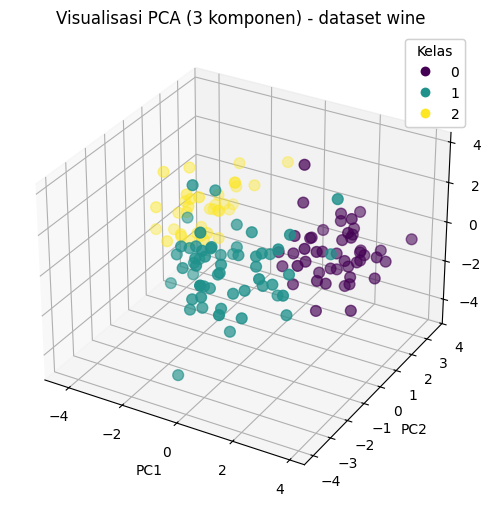

In [17]:
# visualisasi 3D PCA (menggunakan data train)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=y_train,
    s=60
)

ax.set_title('Visualisasi PCA (3 komponen) - dataset wine')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# tambahkan legend berdasarkan kelas
legend1 = ax.legend(
    *scatter.legend_elements(),
    title='Kelas')

ax.add_artist(legend1)

plt.show()

perbandingan model SVM tanpa PCA dan dengan PCA

In [18]:
# membandingkan hasil model tanpa dan dengan PCA
comparison = pd.DataFrame({
    'Model' : ['SVM tanpa PCA', 'SVM dengan PCA (3 komponen)'],
    'Jumlah fitur' : [X_train_scaled.shape[1], X_train_pca.shape[1]],
    'Akurasi' : [acc_no_pca, acc_pca],
    'Variasi total PCA' : [None, explained_var.sum()]
})

comparison

,Model,Jumlah fitur,Akurasi,Variasi total PCA
0,SVM tanpa PCA,13,0.972222,NaN
1,SVM dengan PCA (3 komponen),3,0.972222,0.660826


visualisasi grafik

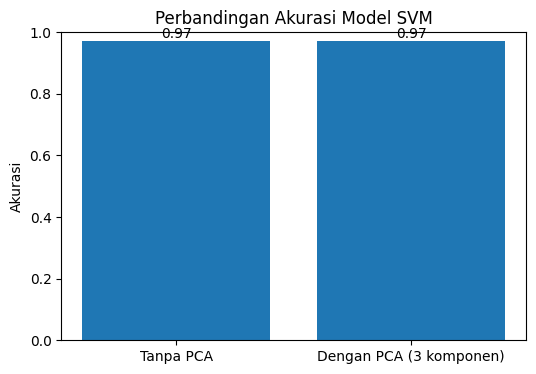

In [19]:
plt.figure(figsize=(6,4))
plt.bar(['Tanpa PCA', 'Dengan PCA (3 komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, v in enumerate([acc_no_pca, acc_pca]):
  plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

# Kesimpulan

Pada praktikum ini telah dilakukan penerapan Principal Component Analysis (PCA) sebagai salah satu
teknik reduksi dimensi untuk menyederhanakan dataset tanpa mengurangi informasi penting secara
signifikan. PCA diimplementasikan pada dataset Sirup, yang awalnya memiliki 13 fitur numerik dan 3
kelas target (jenis Sirup berbeda).
Dari seluruh tahapan yang dilakukan, diperoleh beberapa kesimpulan utama sebagai berikut:
1. Proses reduksi dimensi dengan PCA berhasil mengubah 13 fitur asli menjadi 3 komponen utama
(PC1, PC2, dan PC3). Ketiga komponen tersebut mampu menjelaskan sekitar 66.08% variansi total
dari data asli, yang berarti sebagian besar informasi masih dapat dipertahankan.
2. Model SVM tanpa PCA dan model SVM dengan PCA (3 komponen) menunjukkan akurasi yang
sama tinggi, yaitu 97.22%. Hal ini membuktikan bahwa penerapan PCA tidak menurunkan
performa klasifikasi meskipun jumlah fitur berkurang drastis.
3. Visualisasi 3D PCA menunjukkan bahwa data dari tiga kelas (class_0, class_1, dan class_2) dapat
terpisah dengan cukup baik pada ruang tiga dimensi hasil transformasi PCA, menandakan bahwa
komponen utama berhasil menangkap struktur data yang relevan.
4. Dengan menerapkan PCA, model menjadi lebih efisien secara komputasi, karena bekerja dengan
jumlah fitur yang lebih sedikit, namun tetap mempertahankan kinerja prediksi yang sangat baik.
5. PCA juga membantu mengurangi risiko overfitting, terutama pada dataset dengan dimensi tinggi,
karena menghilangkan korelasi antar fitur dan menyederhanakan representasi data

# **Praktikum mandiri pertemuan 12**

In [20]:
cancer_data = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum12/data/cancer.csv')

cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


* informasi dataset

In [21]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* statistik deskriptif

In [22]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


* data cleaning

In [23]:
# cek missing value
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


* cek data duplikat

In [24]:
df.duplicated().sum()

np.int64(0)

* menghapus kolom yang tidak digunakan

In [26]:
cancer_data = cancer_data.drop(columns=['id', 'Unnamed: 32'])

* mengubah label kategori menjadi numerik

In [28]:
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1, 'B':0})

* distribusi kelas target

In [30]:
cancer_data['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


* memisahkan fitur dan label

In [32]:
X = cancer_data.drop(columns=['diagnosis'])
y = cancer_data['diagnosis']

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (569, 30)
Shape y: (569,)


* pembagian data latih dan uji

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Shape X_train: (455, 30)
Shape X_test: (114, 30)


* standardisasi data

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 5.18558727e-01,  8.91825791e-01,  4.24631702e-01,
         3.83925436e-01, -9.74743706e-01, -6.89771505e-01,
        -6.88586446e-01, -3.98175254e-01, -1.03915470e+00,
        -8.25056321e-01, -1.09317755e-01, -5.59755400e-02,
        -2.10096206e-01, -1.59132582e-02, -1.00518399e+00,
        -9.11941990e-01, -6.62815884e-01, -6.52561081e-01,
        -7.01889114e-01, -2.75393571e-01,  5.79797697e-01,
         1.31324246e+00,  4.66908134e-01,  4.45982711e-01,
        -5.96154777e-01, -6.34722227e-01, -6.10227299e-01,
        -2.35743918e-01,  5.45663235e-02,  2.18367276e-02],
       [-5.16364088e-01, -1.63971029e+00, -5.41348716e-01,
        -5.42961327e-01,  4.76219058e-01, -6.31833818e-01,
        -6.04281166e-01, -3.03074908e-01,  5.21543093e-01,
        -4.54522896e-01, -6.04377961e-01, -1.00104604e+00,
        -5.85429002e-01, -4.93453793e-01,  4.03212009e-01,
        -7.68173276e-01, -4.79187222e-01,  1.14508478e-01,
        -1.42950761e-01, -5.77397732e-01, -5.82458953e-

* penerapan model SVM tanpa PCA

In [52]:
svm_no_pca = SVC(kernel='rbf', gamma='scale')
svm_no_pca.fit(X_train_scaled, y_train)

y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)
print(classification_report(y_test, y_pred_no_pca))

Akurasi SVM tanpa PCA: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



* penerapan PCA (3 komponen)

In [37]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Shape X_train_pca:", X_train_pca.shape)
print("Shape X_testn_pca:", X_test_pca.shape)

Shape X_train_pca: (455, 3)
Shape X_testn_pca: (114, 3)


* menampilkan variasi yang dijelaskan oleh setiap komponen PCA

In [38]:
explained = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained)
print("Total Variansi:", explained.sum())

Explained Variance Ratio: [0.44593522 0.18545255 0.09584641]
Total Variansi: 0.7272341886241546


* visualisasi

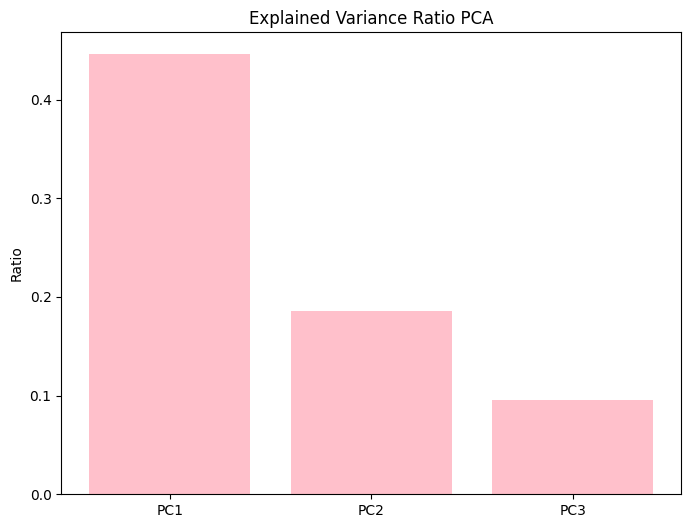

In [53]:
plt.bar(['PC1','PC2','PC3'], explained, color='pink')
plt.title("Explained Variance Ratio PCA")
plt.ylabel("Ratio")
plt.show()

* membuat model SVM dengan PCA

In [54]:
svm_pca = SVC(kernel='rbf', gamma='scale')
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA:", acc_pca)
print(classification_report(y_test, y_pred_pca))

Akurasi SVM dengan PCA: 0.956140350877193
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



* visualisasi SVM dengan PCA

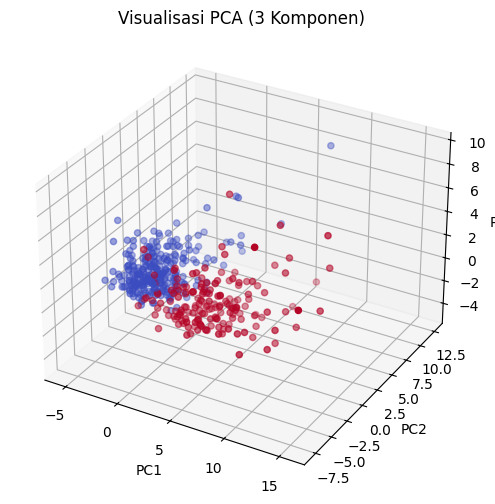

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_train_pca[:,0], X_train_pca[:,1], X_train_pca[:,2],
    c=y_train, cmap='coolwarm'
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("Visualisasi PCA (3 Komponen)")
plt.show()

* perbandingan model SVM dengan PCA dan tanpa PCA

In [44]:
print("Akurasi Tanpa PCA:", acc_no_pca)
print("Akurasi Dengan PCA:", acc_pca)
print("Total Variansi PCA:", explained.sum())

Akurasi Tanpa PCA: 0.9736842105263158
Akurasi Dengan PCA: 0.956140350877193
Total Variansi PCA: 0.7272341886241546


In [49]:
comparison = pd.DataFrame({
    'Model' : ['SVM tanpa PCA', 'SVM dengan PCA (3 komponen)'],
    'Jumlah fitur' : [X_train_scaled.shape[1], X_train_pca.shape[1]],
    'Akurasi' : [acc_no_pca, acc_pca],
    'Total Variasi PCA' : [None, explained_var.sum()]
})

comparison

,Model,Jumlah fitur,Akurasi,Total Variasi PCA
0,SVM tanpa PCA,30,0.973684,NaN
1,SVM dengan PCA (3 komponen),3,0.956140,0.660826


* visualisasi grafik

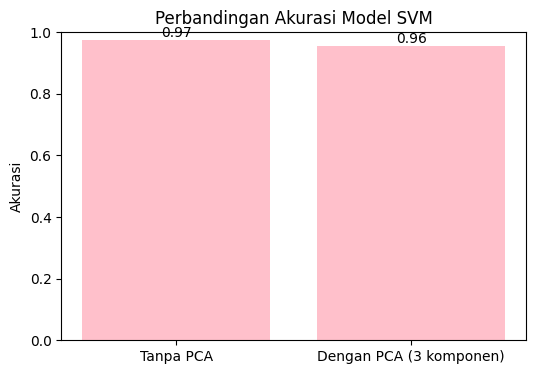

In [78]:
plt.figure(figsize=(6,4))

plt.bar(['Tanpa PCA', 'Dengan PCA (3 komponen)'],
        [acc_no_pca, acc_pca],
        color='pink')

plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)

# menambahkan nilai akurasi di atas batang
for i, v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=10)

plt.show()

# kesimpulan
Melalui penerapan PCA, jumlah fitur pada dataset berhasil diperkecil dari 30 menjadi hanya 3 komponen utama tanpa menghilangkan informasi penting yang dibutuhkan untuk analisis. Meskipun dimensinya berkurang cukup drastis, tingkat akurasi model SVM tetap tinggi dan tidak jauh berbeda dari model yang dijalankan tanpa PCA. Hal ini menunjukkan bahwa penyederhanaan fitur tidak mengganggu kemampuan model dalam melakukan klasifikasi. Selain itu, PCA membantu mempercepat proses pelatihan dan menurunkan kemungkinan terjadinya overfitting karena data yang digunakan menjadi lebih ringkas dan tidak banyak mengandung korelasi antar variabel. Hasil visualisasi 3 dimensi juga memperlihatkan bahwa pemisahan antara kelas benign dan malignant dapat terlihat jelas, menandakan bahwa komponen utama dari PCA mampu menggambarkan pola data secara efektif.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email "jamilatunnisa996@gmail.com"
!git config --global user.name "Jamilatun Khoerunnisa"

!git clone https://github.com/Jamilatun/ti03_Mila_01101222254.git
%cd ti03_Mila_01101222254

!cp -r /content/drive/MyDrive/praktikum_ml/praktikum09/ ./praktikum09

!ls -lah

!git add .
!git commit -m "Upload folder praktikum07 dari Colab"

from getpass import getpass
import os

token = getpass("Masukkan GitHub Token: ")

os.system(f'git remote set-url origin https://{token}@github.com/Jamilatun/ti03_Mila_01101222254.git')

!git push origin main